##PyTorch Workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.3.0+cu121'

##1. Data(preparing and loading)
Data can be almost anything... in machine learning

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

we"ll use a linear regression formula to make a straight line with known **parameters**

In [3]:
#create *known* parameters
weight=0.7
bias=0.3

#create
start =0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) #[X is tensor y is Vector]
y=weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

###Splitting data into training and test sets(one of the most important in ML in general)
Let's create a training and test set with our data

In [5]:
#create a train/test split
train_split=int(0.8*len(X))
train_split

40

In [6]:
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [7]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explore's motta comes in!

"Visualize,visualize,visualize!"

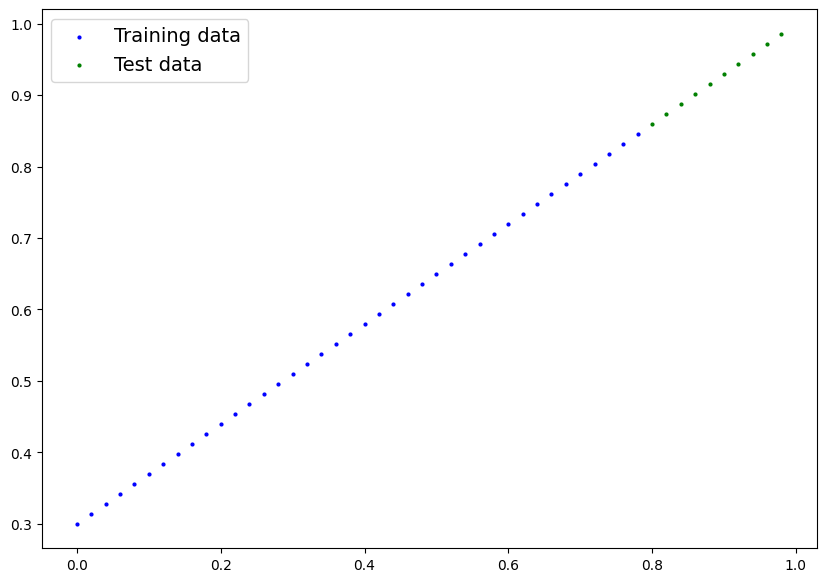

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot the train data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #plot the test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

  if predictions is not None:
    #plot the predictions in red(predictions were made on the test data)
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  #show the legend
  plt.legend(prop={"size":14})

plot_predictions()

## 2. Build model

Our first Pytorch model!

This is very exciting...let's do it!

What our model does:

* Start with random values (weights & bias)
* Look at the training data and adjust  the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data

How does it do so?

Thruogh two main algorithems:
1. Gradient descent
2. Backpropagation


In [9]:
from torch import nn

#create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                           requires_grad=True, # <- can we update this value with gradient descent?
                                           dtype=torch.float)) # <- PyTorch loves float32 by default
    self.bias=nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                       requires_grad=True, # <- can we update this value with gradient descent?))
                                       dtype=torch.float)) # <- PyTorch loves float32 by default

    # Forward defines the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:  #<- "x" is the input data (e.g. training/testing features)
      return self.weights*x+self.bias # <- this is the linear regression formula (y = m*x + b)

In [10]:
torch.randn(1)

tensor([-1.3966])

### PyTorch model buliding essentials

* torch.nn - contains all of the bulidings for computational graphs (a neural networks can be considered a computational graph)
* torch.nn.Parameters - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Modules - The base class for all neural network modules, if you subclass it,you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(),this method defins what happens in the forward computation.

###Checking the contains of our Pytorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [11]:
#create a random seed
torch.manual_seed(42)

#create an instance of the model(this is a subclass of nn.Module)
model_0=LinearRegressionModel()

model_0

LinearRegressionModel()

In [12]:
#check out the parameters
model_0.parameters(),list(model_0.parameters())

(<generator object Module.parameters at 0x7b3a0ed2e260>,
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [13]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
weight,bias

(0.7, 0.3)

###Making prediction using `torch.inference_mode()

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model,it's going to run it through the `forward()` method.

In [15]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [17]:
#Make predictions with model
with torch.inference_mode():
  y_preds=model_0(X_test).detach().numpy()

y_preds

# You can also do something similar with torch.no_grad(),however, torch.inference_mode() is preferred
# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

array([[0.3981617 ],
       [0.40489548],
       [0.41162932],
       [0.41836315],
       [0.42509693],
       [0.43183076],
       [0.43856454],
       [0.44529837],
       [0.45203215],
       [0.45876598]], dtype=float32)

In [18]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

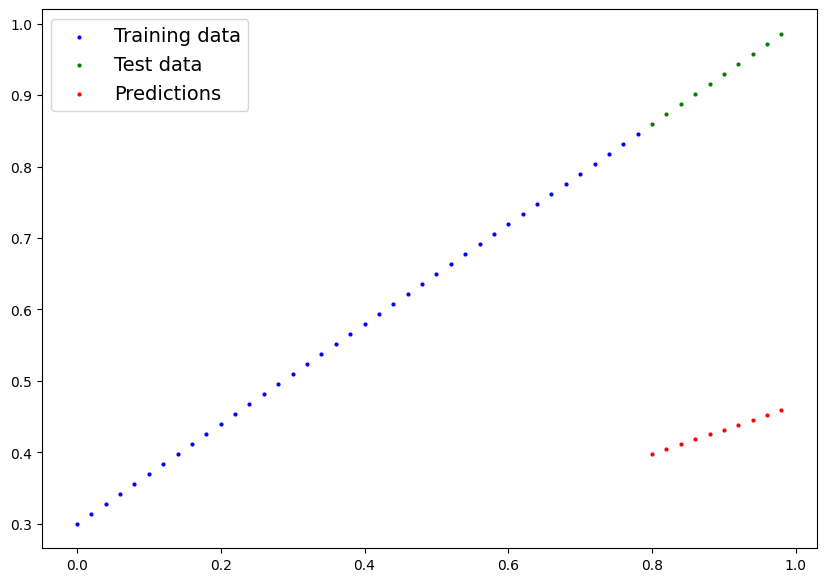

In [19]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters(these may be random) to some *known* parameters.

or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss functions.

* Note: Loss fn may also be called cost fn or criterion in diff areas. For our case, we're going to refer to it as a loss fn.

Things we need to train:

* **Loss fn:** A fn to measure how wrong your model's predictions are to the ideal o/ps, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

  * Inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for eg `params-model_0.parameters()`
    * lr(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes,a large `lr` results in large changes)

And specifically for PyTorch,we need:
* A training loop
* A testing loop

In [20]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
# check out our model's parameters(a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
# Setup a loss fn
loss_fn=nn.L1Loss()

#setup an optimizer (stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01) #lr =learning rate = possibly the most important hyperparameter you can set

**Q:** Which loss fn and optimizer should i use?

**A:** This will be problem specific but with exp,u'll get an idea of what works and what doesn't with your paricular problem set.

for eg, for a regression problem (like ours), a loss fn of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat,u'll likely want to use a loss fn of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involues data moving through our model's `forward()` fns) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [23]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
torch.manual_seed(42)
# An epoch is one loop through the data...(this is a hyperparameters because we've set it ourselves)
epochs=200

#Track diff values
epoch_count=[]
train_loss_values=[]
test_loss_values=[]

#Training
#0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1.Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  train_loss= loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parametes of the model
  train_loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  #Testing
  model_0.eval() #turns off diff settings in the model not needed for evaluation/testing
  with torch.inference_mode(): #turns off gradient tracking & a couple more things behinc the scenes
  #with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    #1. Do the forward pass
    test_pred= model_0(X_test)

    #2. Calculate the loss
    test_loss=loss_fn(test_pred,y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {train_loss} | Test loss: {test_loss}")
    #print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [26]:
import numpy as np
np.array(torch.tensor(train_loss_values).numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

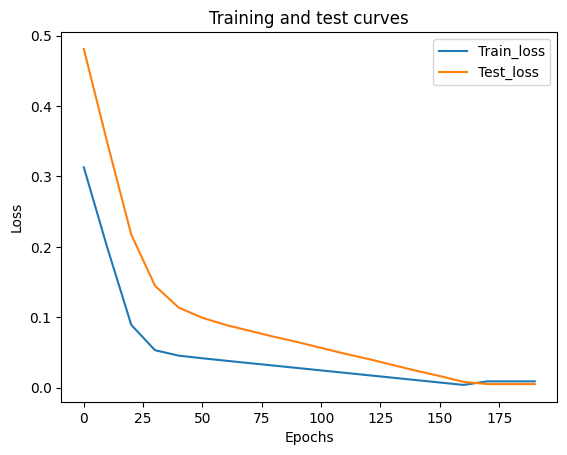

In [27]:
#Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()),label="Train_loss")
plt.plot(epoch_count,test_loss_values,label="Test_loss")
plt.title("Training and test curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
weight,bias

(0.7, 0.3)

In [30]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

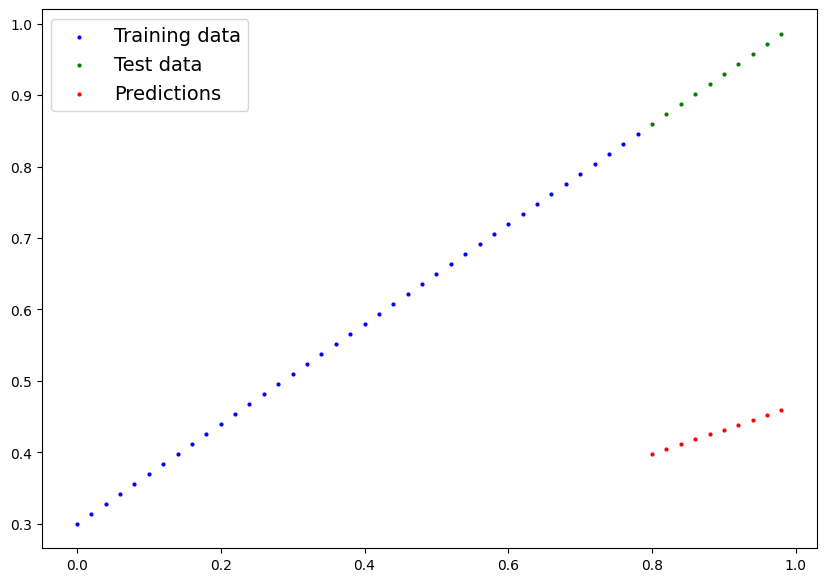

In [31]:
plot_predictions(predictions=y_preds)

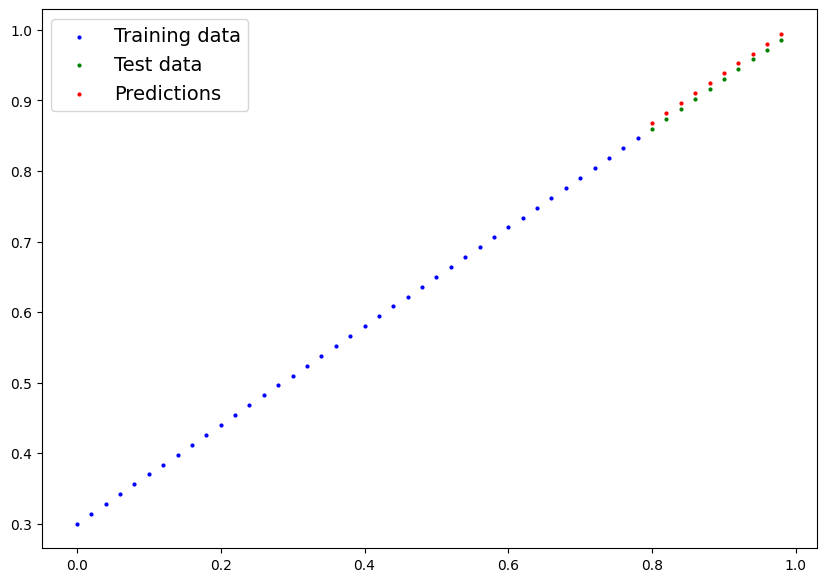

In [32]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [33]:
#Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME= "01_PyTroch_Workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTroch_Workflow_model_0.pth


In [34]:
!ls -1 models

01_PyTroch_Workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [35]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [37]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [39]:
#compare loaded model preds with original model pred
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [40]:
#import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.3.0+cu121'

Create device-agnostic code.

This is means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [41]:
# setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [42]:
# Create some data using the linear regression formula of y = weight * X + bias
weight=0.7
bias=0.3

# create range values
start=0
end=1
step=0.02

# Create X and y (features and labels)
X=torch.arange(start,end,step).unsqueeze(dim=1) #without unsqueeze, error will happen later on (shapes within linear layers)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [43]:
# Split data
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

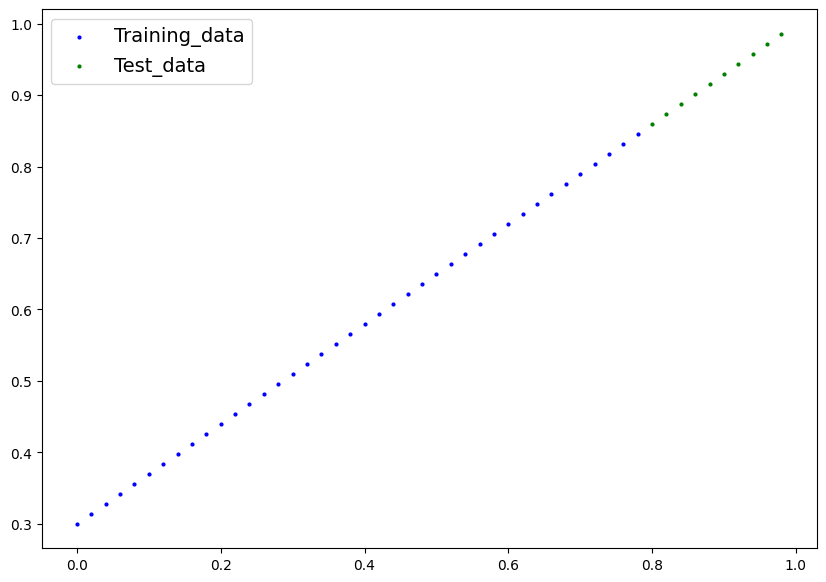

In [44]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",s=4,label="Training_data")

  plt.scatter(test_data,test_labels,c="g",s=4,label="Test_data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14})

# Plot the data
# Note: if you don't have the plot_prediction() fn loaded, this will error
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 Building a Pytorch Linear model

In [45]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# Set the model seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [46]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [47]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [48]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss fn
* Optimizer
* Training loop
* Testing loop

In [49]:
# Setup loss fn
loss_fn=nn.L1Loss() #same as MSE

# Setup our optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [54]:
# Let's write a training loop
torch.manual_seed(42)

epochs=200
epoch_counts=[]
train_loss_value=[]
test_loss_value=[]

# put data on the target device (device agnostic code for data)
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs+1):
  # Training
  model_1.train()

  # 1.Forward pass
  y_pred=model_1(X_train)

  # 2. Calculate the loss
  train_loss=loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)

    test_loss=loss_fn(test_pred,y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_counts.append(epoch)
    train_loss_value.append(train_loss)
    test_loss_value.append(test_loss)
    print(f"Epochs: {epoch} | Loss: {train_loss} | test_loss: {test_loss}")

Epochs: 0 | Loss: 0.5551779866218567 | test_loss: 0.5739762187004089
Epochs: 10 | Loss: 0.4399680495262146 | test_loss: 0.4392663538455963
Epochs: 20 | Loss: 0.3247582018375397 | test_loss: 0.30455657839775085
Epochs: 30 | Loss: 0.20954827964305878 | test_loss: 0.16984674334526062
Epochs: 40 | Loss: 0.09433844685554504 | test_loss: 0.03513689711689949
Epochs: 50 | Loss: 0.023886386305093765 | test_loss: 0.04784906655550003
Epochs: 60 | Loss: 0.0199567973613739 | test_loss: 0.04580312222242355
Epochs: 70 | Loss: 0.016517987474799156 | test_loss: 0.0375305712223053
Epochs: 80 | Loss: 0.013089170679450035 | test_loss: 0.029944902285933495
Epochs: 90 | Loss: 0.009653178043663502 | test_loss: 0.02167237363755703
Epochs: 100 | Loss: 0.006215679459273815 | test_loss: 0.014086711220443249
Epochs: 110 | Loss: 0.002787243574857712 | test_loss: 0.005814164876937866
Epochs: 120 | Loss: 0.0012645035749301314 | test_loss: 0.013801807537674904
Epochs: 130 | Loss: 0.0012645035749301314 | test_loss: 0.

In [55]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [57]:
weight,bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [60]:
# Turn the model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_pred_new=model_1(X_test)

y_pred_new

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

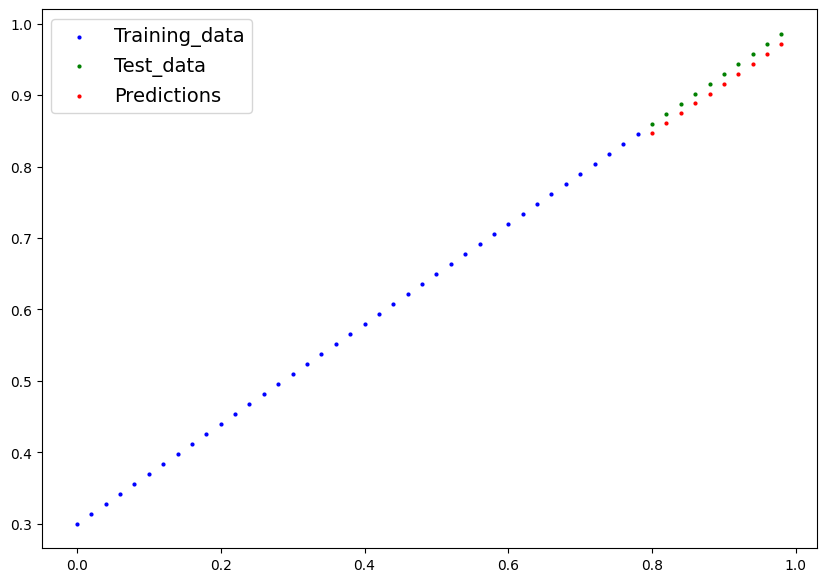

In [61]:
# Check out our model predictions visually
#plot_predictions(predictions=y_pred_new.cpu()) y_pred_new coverted to cpu
plot_predictions(predictions=y_pred_new)

### 6.5 Saving & loading a training model

In [64]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_PyTorch_Workflow_model_1.pt"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_Workflow_model_1.pt


In [65]:
# Load a PyTorch model

# create a new instance of linear regression model v2
loaded_model_1=LinearRegressionModelV2()

#load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [66]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [67]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [68]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)

y_pred_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])